### Pleasanton, CA house price regression

In a separate notebook, I scraped house data from Zillow.com.  The data was for Pleasanton, CA and I filtered on recently sold houses.  The output of my code was two separate CSV files, each containing about 250 home listings.  So, the first step of this notebook will be to read in those two CSV files and merge them into a single Pandas Dataframe.

In [615]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [275]:
df1 = pd.read_csv("2018-04-24_122122.csv")
df2 = pd.read_csv("2018-04-24_131034.csv")

In [127]:
df1.head()

,address,city,zip,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_date,sale_price
0,2804 Tangelo Ct,Pleasanton,94588,3,3,1614,"2,526 sqft",Built in 1998,04/23/18,1039000.0
1,5650 Hansen Dr,Pleasanton,94566,4,2,1527,"6,699 sqft",Built in 1973,04/20/18,1200000.0
2,592 Tawny Dr,Pleasanton,94566,3,2,1956,0.28 acres,Built in 1977,04/19/18,1150000.0
3,2668 Calle Morelia,Pleasanton,94566,5,3,2422,"6,500 sqft",Built in 1984,04/18/18,1430000.0
4,6048 Inglewood Dr,Pleasanton,94588,4,2,1733,"6,499 sqft",Built in 1968,04/18/18,1125000.0


In [128]:
df2.head()

,address,city,zip,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_date,sale_price
0,5223 Ridgevale Way,Pleasanton,94566,3,2,1696,"7,405 sqft",Built in 1965,11/22/17,1097000.0
1,5751 Athenour Ct,Pleasanton,94588,3,3,2131,"3,659 sqft",Built in 1997,11/22/17,1150000.0
2,7334 Elmwood Cir,Pleasanton,94588,3,3,1667,"5,227 sqft",Built in 1986,11/22/17,917000.0
3,4010 Alvarado St,Pleasanton,94566,3,2,1236,"6,973 sqft",Built in 1964,11/22/17,840000.0
4,7802 Lafayette Ct,Pleasanton,94588,5,3,3430,"10,672 sqft",Built in 1996,11/21/17,1510000.0


In [442]:
#concatenate the two dataframes
houses_df = df1.append(df2,ignore_index=True) 

In [443]:
houses_df.shape

(500, 10)

In [581]:
houses_df.head()

,address,city,zip,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_date,sale_price
0,2804 Tangelo Ct,Pleasanton,94588,3,3,1614,"2,526 sqft",Built in 1998,04/23/18,1039000.0
1,5650 Hansen Dr,Pleasanton,94566,4,2,1527,"6,699 sqft",Built in 1973,04/20/18,1200000.0
2,592 Tawny Dr,Pleasanton,94566,3,2,1956,0.28 acres,Built in 1977,04/19/18,1150000.0
3,2668 Calle Morelia,Pleasanton,94566,5,3,2422,"6,500 sqft",Built in 1984,04/18/18,1430000.0
4,6048 Inglewood Dr,Pleasanton,94588,4,2,1733,"6,499 sqft",Built in 1968,04/18/18,1125000.0


The new dataframe has 500 entries.  Now let's check to see what the type is of each column.

In [445]:
print(("bedrooms: {}".format(houses_df['bedrooms'].dtype),
"bathrooms: {}".format(houses_df['bathrooms'].dtype),
"floor size: {}".format(houses_df['floor_size'].dtype),
"lot size: {}".format(houses_df['lot_size'].dtype),
"sale_date: {}".format(houses_df['sale_date'].dtype),
"sale_price: {}".format(houses_df['sale_price'].dtype)))

('bedrooms: object', 'bathrooms: object', 'floor size: object', 'lot size: object', 'sale_date: object', 'sale_price: float64')


The only column that is in the proper format is 'sale_price'.  All of the other columns we will have to convert.

In [446]:
houses_df['bedrooms'].value_counts()

4         227
3         128
5          75
Studio     25
2          21
6          19
--          5
Name: bedrooms, dtype: int64

In [447]:
mask_studio = houses_df['bedrooms'] == 'Studio'
houses_df[mask_studio].head()

,address,city,zip,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_date,sale_price
26,3410 Cornerstone Ct,Pleasanton,94566,Studio,--,--,"6,627 sqft",NaN,04/03/18,1309500.0
55,3410 Cornerstone Ct,Pleasanton,94566,Studio,--,--,"4,028 sqft",NaN,03/27/18,1202500.0
64,3410 Cornerstone Ct,Pleasanton,94566,Studio,--,--,"3,657 sqft",NaN,03/23/18,1064500.0
67,3410 Cornerstone Ct,Pleasanton,94566,Studio,--,--,"3,885 sqft",NaN,03/22/18,1200000.0
75,3410 Cornerstone Ct,Pleasanton,94566,Studio,--,--,"3,815 sqft",NaN,03/16/18,1121500.0


In [448]:
houses_df[mask_studio].tail()

,address,city,zip,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_date,sale_price
399,2383 Silver Oaks Ln,Pleasanton,94566,Studio,--,--,0.52 acres,NaN,09/15/17,2199500.0
400,2383 Silver Oaks Ln,Pleasanton,94566,Studio,--,--,0.52 acres,NaN,09/15/17,2199500.0
403,1600 Valley Ave,Pleasanton,94566,Studio,--,--,0.52 acres,NaN,09/14/17,99625000.0
443,2329 Silver Oaks Ln,Pleasanton,94566,Studio,--,--,0.46 acres,NaN,08/28/17,2154500.0
484,55 W Angela St,Pleasanton,94566,Studio,--,8828,0.45 acres,Built in 2007,08/10/17,4650000.0


25 houses are Studios.  For these houses, since most of them also are missing bathroom, floor_size, and year_built information, I'm just going to drop these entries.

In [449]:
mask_nonstudio = houses_df['bedrooms'] != 'Studio'
houses_df2 = houses_df[mask_nonstudio]
houses_df2.shape

(475, 10)

In [450]:
houses_df2['bedrooms'].value_counts()

4     227
3     128
5      75
2      21
6      19
--      5
Name: bedrooms, dtype: int64

Why are there 5 houses with '--' for bedrooms?

In [451]:
mask_dash = houses_df2['bedrooms'] == '--'
houses_df2[mask_dash]

,address,city,zip,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_date,sale_price
219,4173 Garibaldi Pl,Pleasanton,94566,--,--,--,"1,995 sqft",NaN,12/08/17,358000.0
404,1600 Valley Ave,Pleasanton,94566,--,--,--,1.3 acres,NaN,09/14/17,99625000.0
405,1600 Valley Ave,Pleasanton,94566,--,--,--,1.37 acres,NaN,09/14/17,99625000.0
470,7306 Young Ct,Pleasanton,94588,--,--,1508,2.93 acres,Built in 1958,08/15/17,650000.0
485,630 Happy Valley Rd,Pleasanton,94566,--,--,2632,1 acre,Built in 1967,08/09/17,900000.0


Okay, these rows also have missing data, so we will drop these as well.

In [452]:
mask_nondash = houses_df2['bedrooms'] != '--'
houses_df2 = houses_df2[mask_nondash]
houses_df2.shape

(470, 10)

In [453]:
houses_df2['bedrooms'].value_counts()

4    227
3    128
5     75
2     21
6     19
Name: bedrooms, dtype: int64

Now all of the problem rows have been dropped.  Next step will be to convert the bedrooms column to type int.

In [454]:
houses_df2['bedrooms'] = houses_df2['bedrooms'].astype(int)

In [455]:
houses_df2['bathrooms'].value_counts()

3      182
2      159
2.5     34
4       33
5       23
6       14
3.5      6
1        5
7        4
5.5      3
4.5      3
1.5      3
8        1
Name: bathrooms, dtype: int64

Since there are half bathrooms, we will convert these to type float.

In [456]:
houses_df2['bathrooms'] = houses_df2['bathrooms'].astype(float)

In [457]:
houses_df2.head()

,address,city,zip,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_date,sale_price
0,2804 Tangelo Ct,Pleasanton,94588,3,3.0,1614,"2,526 sqft",Built in 1998,04/23/18,1039000.0
1,5650 Hansen Dr,Pleasanton,94566,4,2.0,1527,"6,699 sqft",Built in 1973,04/20/18,1200000.0
2,592 Tawny Dr,Pleasanton,94566,3,2.0,1956,0.28 acres,Built in 1977,04/19/18,1150000.0
3,2668 Calle Morelia,Pleasanton,94566,5,3.0,2422,"6,500 sqft",Built in 1984,04/18/18,1430000.0
4,6048 Inglewood Dr,Pleasanton,94588,4,2.0,1733,"6,499 sqft",Built in 1968,04/18/18,1125000.0


Now we will examine floor_size to see if any are nulls.

In [458]:
houses_df2['floor_size'].isnull().sum()

0

In [459]:
houses_df2['floor_size'] = houses_df2['floor_size'].astype(int)

The lot_size column is going to be a little more tricky to convert, because it appears some are labeled 'sqft' and some are 'acres'.  We will first convert the columns listed as 'acres' to 'sqft'.  Then we can drop the 'sqft' label and convert to a type int.

In [460]:
for index, row in houses_df2.iterrows():
    value = row['lot_size']
    if 'acres' in value:
        acres_str = value.split()[0]
        acres_int = int(float(acres_str) * 43560) 
        houses_df2.loc[index,'lot_size'] = acres_int
    elif 'sqft' in value:
        sqft_str = value.split()[0]
        sqft_int = int(sqft_str.replace(",", ""))
        houses_df2.loc[index,'lot_size'] = sqft_int

In [462]:
mask_None = houses_df2['lot_size'] == 'None'
mask_None.sum()

6

6 houses have 'None' for their lot_size, so I will drop these rows.

In [463]:
mask_notNone = houses_df2['lot_size'] != 'None'
houses_df2 = houses_df2[mask_notNone]

In [464]:
houses_df2['lot_size'] = houses_df2['lot_size'].astype(int)
houses_df2['lot_size'].dtype

dtype('int64')

In [465]:
houses_df2.isnull().sum()

address       0
city          0
zip           0
bedrooms      0
bathrooms     0
floor_size    0
lot_size      0
year_built    0
sale_date     0
sale_price    6
dtype: int64

In [466]:
houses_df2.shape

(464, 10)

Now we have to convert the 'year_built' string to a single four-digit year.

In [467]:
for index, row in houses_df2.iterrows():
    value = row['year_built']
    try:
        year_str = value.split(' ')[2]
        year = int(year_str)
    except:
        year = np.nan
    houses_df2.loc[index,'year_built'] = year

In [468]:
houses_df2['year_built'].isnull().sum()

0

In [249]:
#houses_df2[houses_df2['year_built'].isnull()]

Okay, only 1 house has nan for the year_built column.  Instead of trying to impute these values, we will just drop this row.

In [250]:
houses_df2 = houses_df2[houses_df2['year_built'].notnull()]

In [469]:
houses_df2.shape

(464, 10)

In [470]:
houses_df2.tail()

,address,city,zip,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_date,sale_price
495,7535 Maywood Dr,Pleasanton,94588,3,2.5,1851,2661,1973,08/02/17,735000.0
496,7892 Chestnut Way,Pleasanton,94588,3,2.0,1544,6926,1973,08/02/17,1035000.0
497,4950 Monaco Dr,Pleasanton,94566,3,3.0,3868,17859,1988,08/02/17,1515000.0
498,2715 Calle De La Loma,Pleasanton,94566,4,2.5,3027,6403,1989,08/02/17,1365000.0
499,1070 Nolan Ct,Pleasanton,94566,5,4.5,3067,6298,2005,08/02/17,1680000.0


Now we should convert 'sale_date' to a datetime format.  I should know how to do this by now.

In [471]:
houses_df2['sale_date'].value_counts()[-20:]

09/18/17       1
01/18/18       1
11/16/17       1
10/17/17       1
09/06/17       1
04/06/18       1
08/07/17       1
01/03/18       1
09/12/17       1
03/06/18       1
10/25/17       1
09/14/17       1
12/27/17       1
04/13/18       1
01/22/18       1
$3,600  /mo    1
08/09/17       1
01/02/18       1
10/16/17       1
$948,888       1
Name: sale_date, dtype: int64

A few of these have '$' signs.  We will just drop these rows to make our lives easier

In [472]:
for index, row in houses_df2.iterrows():
    if '$' in row['sale_date']:
        houses_df2.loc[index,'sale_date'] = np.nan

In [473]:
houses_df2 = houses_df2[houses_df2['sale_date'].notnull()]

In [474]:
houses_df2.shape

(458, 10)

In [475]:
houses_df2["sale_date"] = pd.to_datetime(houses_df2['sale_date'] , format="%m/%d/%y")

In [476]:
houses_df2.head()

,address,city,zip,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_date,sale_price
0,2804 Tangelo Ct,Pleasanton,94588,3,3.0,1614,2526,1998,2018-04-23,1039000.0
1,5650 Hansen Dr,Pleasanton,94566,4,2.0,1527,6699,1973,2018-04-20,1200000.0
2,592 Tawny Dr,Pleasanton,94566,3,2.0,1956,12196,1977,2018-04-19,1150000.0
3,2668 Calle Morelia,Pleasanton,94566,5,3.0,2422,6500,1984,2018-04-18,1430000.0
4,6048 Inglewood Dr,Pleasanton,94588,4,2.0,1733,6499,1968,2018-04-18,1125000.0


Just to be safe, now that we have our cleaned dataframe, I'm going to save it as a csv file, so that I can reload it later if I need to.  Lessons learned from previous mistakes.

In [477]:
houses_df2.to_csv('Zillow_houses_cleaned.csv')

In [478]:
houses_df2.to_pickle('Zillow_df.pkl')

In [479]:
houses_df3 = pd.read_pickle('Zillow_df.pkl')

In [480]:
houses_df3.head()

,address,city,zip,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_date,sale_price
0,2804 Tangelo Ct,Pleasanton,94588,3,3.0,1614,2526,1998,2018-04-23,1039000.0
1,5650 Hansen Dr,Pleasanton,94566,4,2.0,1527,6699,1973,2018-04-20,1200000.0
2,592 Tawny Dr,Pleasanton,94566,3,2.0,1956,12196,1977,2018-04-19,1150000.0
3,2668 Calle Morelia,Pleasanton,94566,5,3.0,2422,6500,1984,2018-04-18,1430000.0
4,6048 Inglewood Dr,Pleasanton,94588,4,2.0,1733,6499,1968,2018-04-18,1125000.0


In [481]:
houses_df3.tail()

,address,city,zip,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_date,sale_price
495,7535 Maywood Dr,Pleasanton,94588,3,2.5,1851,2661,1973,2017-08-02,735000.0
496,7892 Chestnut Way,Pleasanton,94588,3,2.0,1544,6926,1973,2017-08-02,1035000.0
497,4950 Monaco Dr,Pleasanton,94566,3,3.0,3868,17859,1988,2017-08-02,1515000.0
498,2715 Calle De La Loma,Pleasanton,94566,4,2.5,3027,6403,1989,2017-08-02,1365000.0
499,1070 Nolan Ct,Pleasanton,94566,5,4.5,3067,6298,2005,2017-08-02,1680000.0


In [482]:
houses_df3.reset_index(inplace=True)
houses_df3.head()

,index,address,city,zip,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_date,sale_price
0,0,2804 Tangelo Ct,Pleasanton,94588,3,3.0,1614,2526,1998,2018-04-23,1039000.0
1,1,5650 Hansen Dr,Pleasanton,94566,4,2.0,1527,6699,1973,2018-04-20,1200000.0
2,2,592 Tawny Dr,Pleasanton,94566,3,2.0,1956,12196,1977,2018-04-19,1150000.0
3,3,2668 Calle Morelia,Pleasanton,94566,5,3.0,2422,6500,1984,2018-04-18,1430000.0
4,4,6048 Inglewood Dr,Pleasanton,94588,4,2.0,1733,6499,1968,2018-04-18,1125000.0


In [483]:
houses_df3.drop(columns=['index'], inplace=True)

In [484]:
houses_df3.head()

,address,city,zip,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_date,sale_price
0,2804 Tangelo Ct,Pleasanton,94588,3,3.0,1614,2526,1998,2018-04-23,1039000.0
1,5650 Hansen Dr,Pleasanton,94566,4,2.0,1527,6699,1973,2018-04-20,1200000.0
2,592 Tawny Dr,Pleasanton,94566,3,2.0,1956,12196,1977,2018-04-19,1150000.0
3,2668 Calle Morelia,Pleasanton,94566,5,3.0,2422,6500,1984,2018-04-18,1430000.0
4,6048 Inglewood Dr,Pleasanton,94588,4,2.0,1733,6499,1968,2018-04-18,1125000.0


Text(0.5,1,'Histogram of house prices')

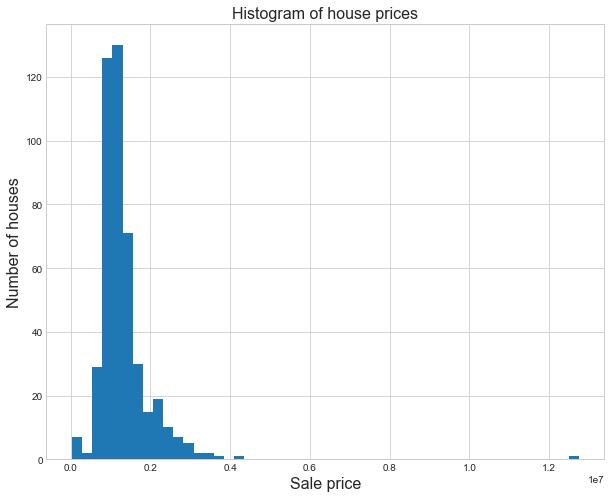

In [598]:
fig = plt.figure(figsize=(10,8))
plt.hist(houses_df3['sale_price'],bins=50)
plt.xlabel('Sale price', fontsize=16)
plt.ylabel('Number of houses', fontsize=16)
plt.title('Histogram of house prices', fontsize=16)

In [599]:
fig.savefig('House_price_hist.png',dpi=300)

Before I start the linear regression, I should drop a few columns including address, city, and zip.

In [485]:
houses_df3.drop(columns = ['address','city','zip'], inplace=True)

In [486]:
houses_df3.head()

,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_date,sale_price
0,3,3.0,1614,2526,1998,2018-04-23,1039000.0
1,4,2.0,1527,6699,1973,2018-04-20,1200000.0
2,3,2.0,1956,12196,1977,2018-04-19,1150000.0
3,5,3.0,2422,6500,1984,2018-04-18,1430000.0
4,4,2.0,1733,6499,1968,2018-04-18,1125000.0


Let's first examine the correlation coefficient matrix.

In [487]:
houses_df3.corr()

,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_price
bedrooms,1.000000,0.622219,0.649987,0.235104,0.200725,0.393854
bathrooms,0.622219,1.000000,0.886732,0.379988,0.511072,0.564363
floor_size,0.649987,0.886732,1.000000,0.436578,0.478779,0.626475
lot_size,0.235104,0.379988,0.436578,1.000000,0.124390,0.289673
year_built,0.200725,0.511072,0.478779,0.124390,1.000000,0.219086
sale_price,0.393854,0.564363,0.626475,0.289673,0.219086,1.000000


In [488]:
houses_df3.corr()['sale_price'].sort_values(ascending=False)

sale_price    1.000000
floor_size    0.626475
bathrooms     0.564363
bedrooms      0.393854
lot_size      0.289673
year_built    0.219086
Name: sale_price, dtype: float64

None of the correlations are very string (i.e. > 0.8).  Still, I think it'll be interesting what we find out through regression.

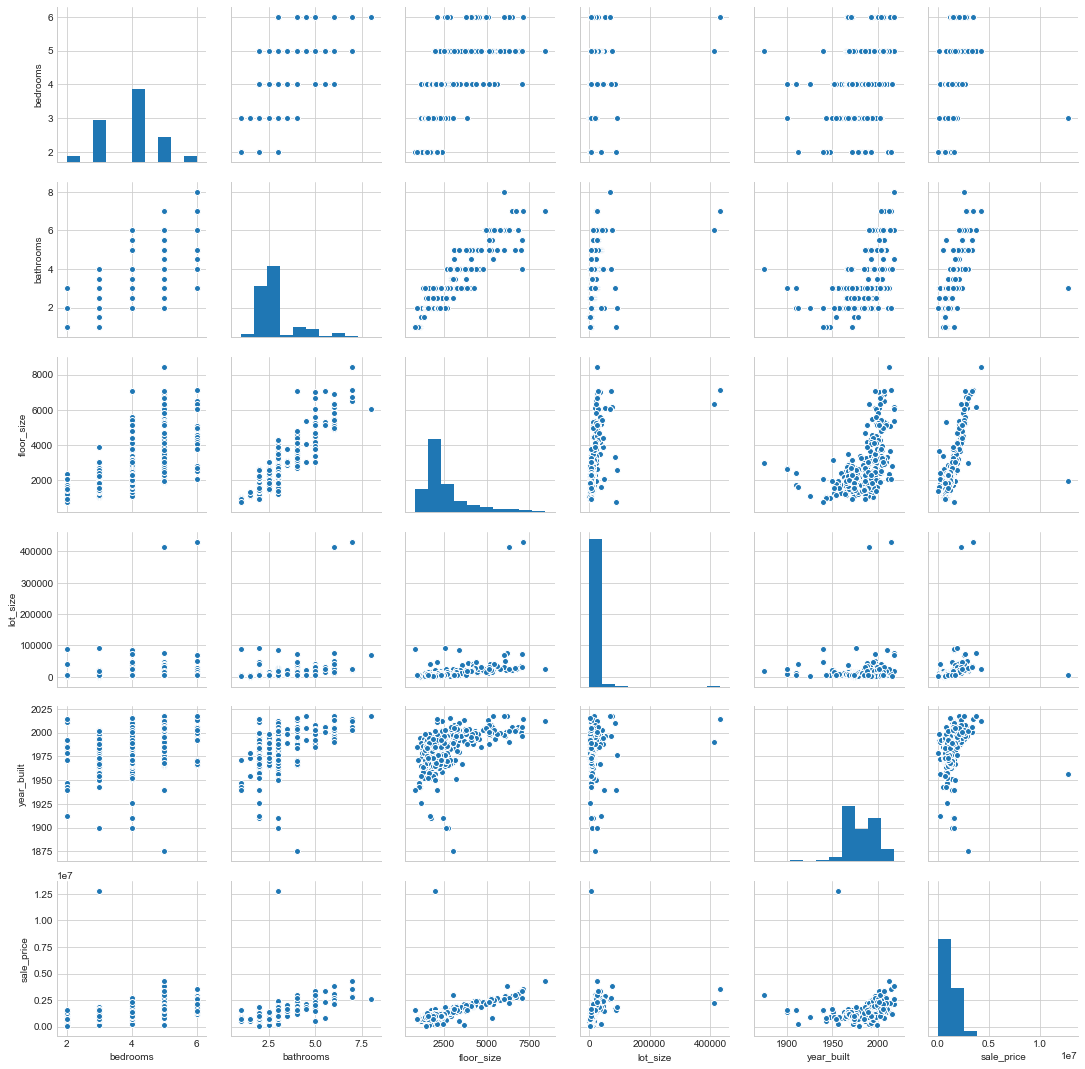

In [489]:
sns.pairplot(houses_df3)

Based on the pairplot data, it appears that there are a number of outliers that may affect our regression.  In particular, when the sale_price > 10e6 and the lot_size > 2e5 sq ft.  I will likely throw these data points out.  However, I will wait to do that until after I observe the results of my preliminary model.

In [297]:
y = houses_df3['sale_price']  # setting y to be the target value (e.g., 'SalePrice')
X = houses_df3.drop('sale_price',axis=1) # setting X to be everything but the target value
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [299]:
#lr = LinearRegression().fit(X_train,y_train)

When I run LinearRegression using all the data, I get an exception error on the 'sale_date' feature, because it is in a datetime format.  To circumvent this problem, I'm going to extract sale month and sale year from this data.  This could be useful.

In [490]:
houses_df3['sale_month'] = houses_df3['sale_date'].map(lambda x: x.month)
houses_df3['sale_year'] = houses_df3['sale_date'].map(lambda x: x.year)

In [491]:
houses_df3.tail()

,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_date,sale_price,sale_month,sale_year
453,3,2.5,1851,2661,1973,2017-08-02,735000.0,8,2017
454,3,2.0,1544,6926,1973,2017-08-02,1035000.0,8,2017
455,3,3.0,3868,17859,1988,2017-08-02,1515000.0,8,2017
456,4,2.5,3027,6403,1989,2017-08-02,1365000.0,8,2017
457,5,4.5,3067,6298,2005,2017-08-02,1680000.0,8,2017


In [492]:
houses_df4 = houses_df3.drop(columns = ['sale_date'])

In [493]:
y = houses_df4['sale_price']  # setting y to be the target value (e.g., 'SalePrice')
X = houses_df4.drop('sale_price',axis=1) # setting X to be everything but the target value
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [494]:
lr = LinearRegression().fit(X_train,y_train)

In [495]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [-6.14561076e+04  7.76000290e+04  4.00525486e+02 -4.67290626e-01
 -4.71918419e+03  6.15985283e+04  4.69520250e+05]
lr.intercept_: -937941575.6418099


My coefficients and intercept are really large.  This is probably due to the fact that my target values are large.  I think I need to normalize my data.

In [496]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.37
Test set score: 0.73


Yikes!  These preliminary scores are really bad!  Moreover, why is the score on the test data so much better than the training data?

A few things I want to do are:
* throw out the large sale price data point (>10e6)
* throw out any very small sale price data points
* throw out the large lot size data points (>4e5)
* reexamine the pair plots

In [497]:
def remove_outlier(df,column,thresh):
    mask = df[column] < thresh
    df_new = df[mask]
    return df_new

In [498]:
houses_df5 = remove_outlier(houses_df4,'sale_price',1e7)

In [499]:
houses_df5 = remove_outlier(houses_df5, 'lot_size', 4e5)

In [500]:
houses_df5.sort_values(by='sale_price')[:12]

,bedrooms,bathrooms,floor_size,lot_size,year_built,sale_price,sale_month,sale_year
292,2,2.0,1421,3842,1979,30500.0,10,2017
137,5,3.0,3655,11325,1991,108455.0,1,2018
289,3,2.5,1614,3504,1999,111000.0,10,2017
146,4,2.5,2100,10384,1972,217000.0,1,2018
111,2,2.0,1650,40075,1912,227000.0,2,2018
122,3,2.0,1780,8000,1956,231000.0,2,2018
158,4,3.0,2420,4362,1990,268500.0,1,2018
199,3,2.5,1666,4104,1992,358000.0,12,2017
91,4,5.0,3396,16988,1992,487000.0,3,2018
204,2,2.0,1118,1260,1985,540000.0,12,2017


In [501]:
mask_sp = houses_df5['sale_price'] > 4e5
houses_df5 = houses_df5[mask_sp]

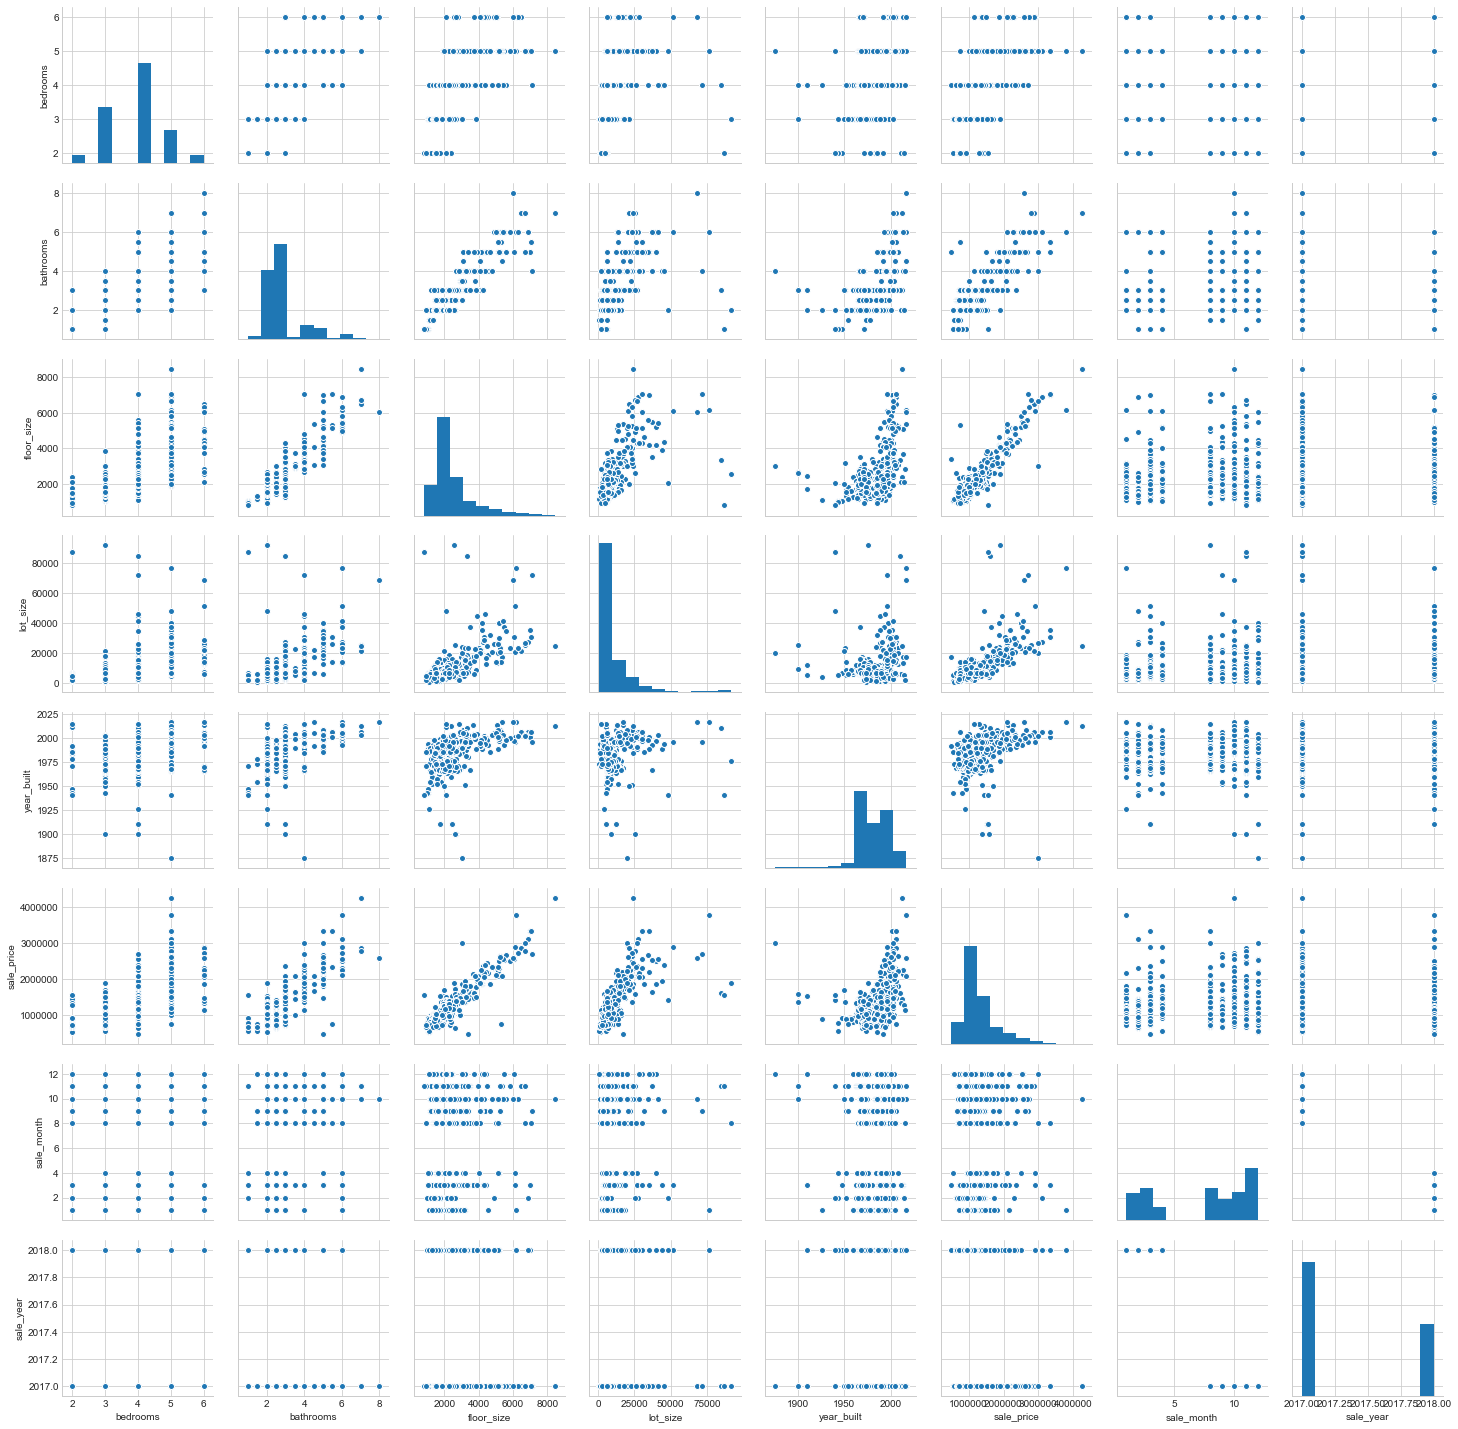

In [600]:
pairplot = sns.pairplot(houses_df5)
pairplot.savefig('pair_plot.png',dpi=300)

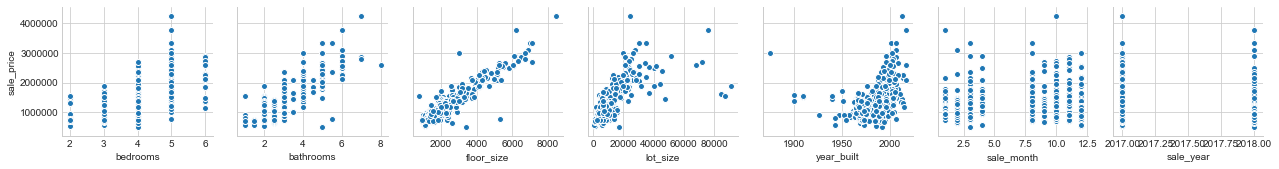

In [603]:
pairplot2 = sns.pairplot(houses_df5,x_vars=['bedrooms','bathrooms','floor_size','lot_size','year_built','sale_month','sale_year'],y_vars=['sale_price'])
pairplot2.savefig('pair_plot2.png',dpi=300)

Let's look at the correlations again.

In [503]:
houses_df5.corr()['sale_price'].sort_values(ascending=False)

sale_price    1.000000
floor_size    0.915636
bathrooms     0.792113
lot_size      0.663012
bedrooms      0.592761
year_built    0.369638
sale_year     0.035768
sale_month   -0.022336
Name: sale_price, dtype: float64

I'm going to pickle this data before proceeding.

In [634]:
houses_df5.to_pickle('Zillow_df_ver2.pkl')

floor_size is a really good predictor of sale_price, so my base model will only use this feature.

In [504]:
y1 = houses_df5['sale_price']
X1 = houses_df5['floor_size']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state=0,test_size=0.2)

In [505]:
X1_train = X1_train.reshape(-1,1)

/Users/bwsturm/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [506]:
lr_1 = LinearRegression().fit(X1_train,y1_train)

Next I want to generate my cross validation scores using a 5-fold cross validation.

In [507]:
scores = cross_val_score(lr_1,X1_train,y1_train,cv=5)
print("Cross-validation scores for baseline linear regression model: {}".format(scores))

Cross-validation scores for baseline linear regression model: [0.84882017 0.82546535 0.89306556 0.85608188 0.75550389]


In [516]:
print("Training set score: {:.2f}".format(lr_1.score(X1_train, y1_train)))
print("The average cross-validation score is: {:.2f}".format(scores.mean()))

Training set score: 0.85
The average cross-validation score is: 0.84


In [617]:
y1_pred = lr_1.predict(X1_train)
print("Training set RMSE: {:.2f}".format(rmse(y1_train,y1_pred)))

Training set RMSE: 212813.11


In [509]:
lr_1.intercept_

330564.3685511411

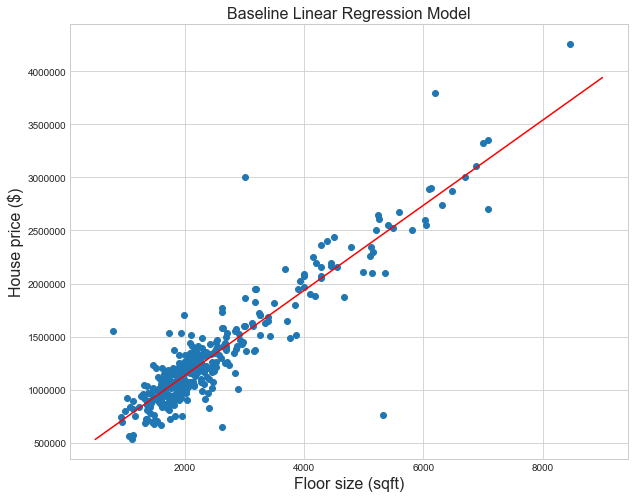

In [637]:
fig_baseline = plt.figure(figsize=(10,8))
plt.plot(X1_train,y1_train,'o')
x_dat=np.arange(500,9000)
line_best_fit = lr_1.intercept_ + x_dat * lr_1.coef_
plt.plot(x_dat, line_best_fit,'r-')
plt.xlabel('Floor size (sqft)',fontsize=16)
plt.ylabel('House price ($)', fontsize=16)
plt.title('Baseline Linear Regression Model',fontsize=16)
fig_baseline.savefig('lin_reg_baseline.png',dpi=300)

This provides a very good baseline.  What happens when we add more features?

In [511]:
y2 = houses_df5['sale_price']  # setting y to be the target value (e.g., 'SalePrice')
X2 = houses_df5.drop('sale_price',axis=1) # setting X to be everything but the target value
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state=0)

In [512]:
lr_2 = LinearRegression().fit(X2_train,y2_train)

Now we generate a cross validation score again using 5-fold cross validation.

In [513]:
scores = cross_val_score(lr_2,X2_train,y2_train,cv=5)
print("Cross-validation scores for linear regression model with all features: {}".format(scores))

Cross-validation scores for linear regression model with all features: [0.77417883 0.83657755 0.90172542 0.88039438 0.80706731]


In [517]:
print("Training set score: {:.2f}".format(lr_2.score(X2_train, y2_train)))
print("The average cross-validation score is: {:.2f}".format(scores.mean()))

Training set score: 0.87
The average cross-validation score is: 0.84


In [618]:
y2_pred = lr_2.predict(X2_train)
print("Training set RMSE: {:.2f}".format(rmse(y2_train,y2_pred)))

Training set RMSE: 195713.15


In [563]:
lr_2.coef_

array([-4.15189154e+03,  2.28649356e+04,  3.63132659e+02,  6.94464126e+00,
       -2.33695514e+03,  1.70129618e+04,  2.19383559e+05])

The R^2 score on the cross validation data is actually no better with more features.  Interesting!  Let's see what the output of stats model gives us.

In [515]:
import statsmodels.formula.api as smf

# Define the model
lm1 = smf.ols('sale_price ~ bedrooms + bathrooms + floor_size + lot_size + year_built + sale_month + sale_year', data=houses_df5)

lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     405.0
Date:                Wed, 25 Apr 2018   Prob (F-statistic):          4.34e-187
Time:                        22:05:37   Log-Likelihood:                -6070.9
No. Observations:                 447   AIC:                         1.216e+04
Df Residuals:                     439   BIC:                         1.219e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.748e+08   1.14e+08     -3.293      0.001   -5.99e+08   -1.51e+08
bedrooms    1814.5525   1.46e+04      0.125      0.901   -2.68e+04    3.04e+04
bathrooms  -3367.6203    1.9e+04     -0.177      0.859   -4.07e+04     3.4e+04
floor_size   373.2247     19.102     19.539      0.000     335.682     410.767
lot_size       7.1670      1.062      6.747      0.000       5.079       9.255
year_built -1586.0611    655.517     -2.420      0.016   -2874.402    -297.720
sale_month   1.41e+04   7203.931      1.958      0.051     -54.616    2.83e+04
sale_year   1.875e+05   5.63e+04      3.330      0.001    7.68e+04    2.98e+05
==============================================================================
Omnibus:                      205.371   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6291.596
Skew:                          -1.335   Prob(JB):                         0.00
Kurtosis:                      21.184   Cond. No.                     1.98e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [421]:
houses_df5.columns

Index(['bedrooms', 'bathrooms', 'floor_size', 'lot_size', 'year_built',
       'sale_price', 'sale_month', 'sale_year'],
      dtype='object')

Based on the stats model results, the coefficients corresponding to the bedrooms and bathrooms are likely not very signficant in determining the price.  

Let's do a Ridge regression next and do a grid search to find the best alpha.  

In [518]:
from sklearn.model_selection import GridSearchCV

In [619]:
param_grid = {'alpha':[.001, .01, .1, 1, 10]}
grid_search = GridSearchCV(Ridge(),param_grid,cv=5)

In [620]:
grid_search.fit(X2_train,y2_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [621]:
print("Training set score: {:.2f}".format(grid_search.score(X2_train, y2_train)))
print("The average cross-validation score is: {:.2f}".format(grid_search.best_score_))

Training set score: 0.87
The average cross-validation score is: 0.84


In [622]:
y2_pred = grid_search.predict(X2_train)
print("Training set RMSE: {:.2f}".format(rmse(y2_train,y2_pred)))

Training set RMSE: 195748.16


In [528]:
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'alpha': 1}


In [529]:
grid_search.best_estimator_.coef_

array([-3.84023459e+03,  2.25905314e+04,  3.63092508e+02,  6.98033826e+00,
       -2.37182772e+03,  1.42571721e+04,  1.96225272e+05])

The scores for the linear regression and Ridge regression models were exactly the same.  Just to see if there is any possible improvement, I will also do a grid search for Lasso regression.

In [534]:
from sklearn.linear_model import Lasso

In [623]:
param_grid = {'alpha':[.001, .01, .1, 1, 10, 100], 'max_iter':[100000], 'normalize':[True,False]}
grid_search = GridSearchCV(Lasso(),param_grid,cv=3)

In [624]:
grid_search.fit(X2_train,y2_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100000], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [625]:
print("Training set score: {:.2f}".format(grid_search.score(X2_train, y2_train)))
print("The average cross-validation score is: {:.2f}".format(grid_search.best_score_))

Training set score: 0.86
The average cross-validation score is: 0.85


In [626]:
y2_pred = grid_search.predict(X2_train)
print("Training set RMSE: {:.2f}".format(rmse(y2_train,y2_pred)))

Training set RMSE: 196035.38


In [575]:
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'alpha': 100, 'max_iter': 100000, 'normalize': True}


In [578]:
grid_search.best_estimator_.coef_

array([ 0.00000000e+00,  1.96912592e+04,  3.60073291e+02,  7.06305733e+00,
       -2.17384661e+03,  9.00431368e+03,  1.55570475e+05])

In [579]:
X2_train.columns

Index(['bedrooms', 'bathrooms', 'floor_size', 'lot_size', 'year_built',
       'sale_month', 'sale_year'],
      dtype='object')

In [577]:
grid_search.grid_scores_

/Users/bwsturm/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.84450, std: 0.04797, params: {'alpha': 0.001, 'max_iter': 100000, 'normalize': True},
 mean: 0.84450, std: 0.04797, params: {'alpha': 0.001, 'max_iter': 100000, 'normalize': False},
 mean: 0.84450, std: 0.04797, params: {'alpha': 0.01, 'max_iter': 100000, 'normalize': True},
 mean: 0.84450, std: 0.04797, params: {'alpha': 0.01, 'max_iter': 100000, 'normalize': False},
 mean: 0.84450, std: 0.04797, params: {'alpha': 0.1, 'max_iter': 100000, 'normalize': True},
 mean: 0.84450, std: 0.04797, params: {'alpha': 0.1, 'max_iter': 100000, 'normalize': False},
 mean: 0.84452, std: 0.04797, params: {'alpha': 1, 'max_iter': 100000, 'normalize': True},
 mean: 0.84450, std: 0.04797, params: {'alpha': 1, 'max_iter': 100000, 'normalize': False},
 mean: 0.84465, std: 0.04799, params: {'alpha': 10, 'max_iter': 100000, 'normalize': True},
 mean: 0.84450, std: 0.04797, params: {'alpha': 10, 'max_iter': 100000, 'normalize': False},
 mean: 0.84539, std: 0.04843, params: {'alpha': 100, 'max_iter': 

Based on the results above, the Lasso regression model ignores the Bedrooms feature.

Now I'd like to look at the residual plots using the linear regression data using all available features.

In [530]:
y2_train_predict = lr_2.predict(X2_train)
y2_test_predict = lr_2.predict(X2_test)

In [324]:
#sns.residplot(y_train_predict,y_train)

In [531]:
sns.set_style('whitegrid')

Text(0.5,1,'Train data predictions')

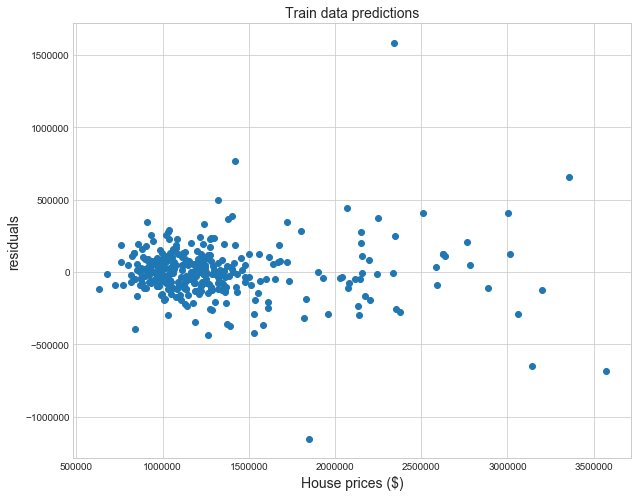

In [532]:
plt.figure(figsize=(10,8))
plt.plot(y2_train_predict,(y2_train_predict-y2_train),'o')
plt.xlabel('House prices ($)',fontsize=14)
plt.ylabel('residuals',fontsize=14)
plt.title('Train data predictions',fontsize=14)

next examining residuals on the test data

Text(0.5,1,'Test data predictions')

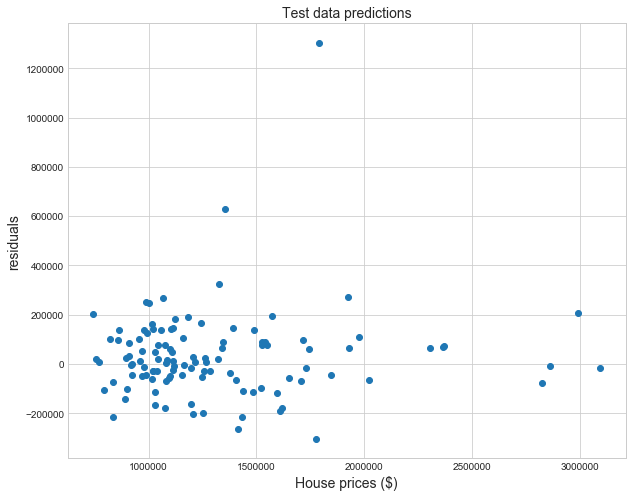

In [533]:
plt.figure(figsize=(10,8))
plt.plot(y2_test_predict,(y2_test_predict-y2_test),'o')
plt.xlabel('House prices ($)',fontsize=14)
plt.ylabel('residuals',fontsize=14)
plt.title('Test data predictions', fontsize=14)

Using the Linear regression model, the final scores are:

In [606]:
print("Accuracy on the test set with LR: {:.3f}".format(lr_2.score(X2_test, y2_test)))

Accuracy on the test set: 0.862


In [628]:
y2_pred_test = lr_2.predict(X2_test)
print("Test set RMSE: {:.2f}".format(rmse(y2_test,y2_pred_test)))

Test set RMSE: 181919.48


In [607]:
print("Accuracy on the test set with Lasso: {:.3f}".format(grid_search.score(X2_test, y2_test)))

Accuracy on the test set with Lasso: 0.865


In [627]:
y2_pred_test = grid_search.predict(X2_test)
print("Test set RMSE: {:.2f}".format(rmse(y2_test,y2_pred_test)))

Test set RMSE: 179922.48


I also want to examine the residual plots based on Lasso regression model.

In [608]:
y2_train_predict_lasso = grid_search.predict(X2_train)
y2_test_predict_lasso = grid_search.predict(X2_test)

Text(0.5,1,'Train data predictions')

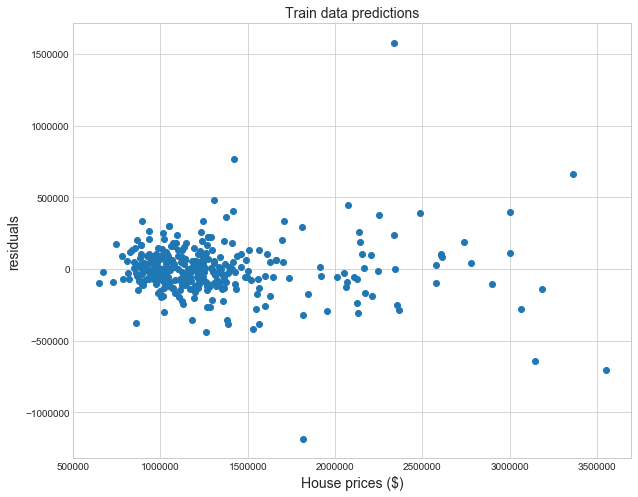

In [612]:
fig_resid1 = plt.figure(figsize=(10,8))
plt.plot(y2_train_predict_lasso,(y2_train_predict_lasso-y2_train),'o')
plt.xlabel('House prices ($)',fontsize=14)
plt.ylabel('residuals',fontsize=14)
plt.title('Train data predictions',fontsize=14)

In [613]:
fig_resid1.savefig('Train_data_residuals.png',dpi=300)

Text(0.5,1,'Test data predictions')

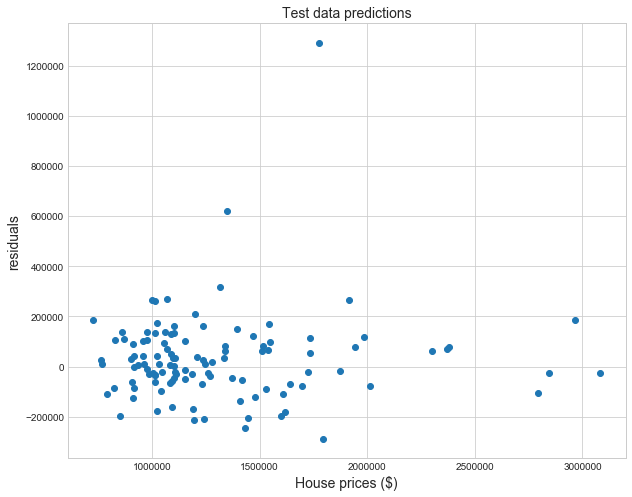

In [610]:
plt.figure(figsize=(10,8))
plt.plot(y2_test_predict_lasso,(y2_test_predict_lasso-y2_test),'o')
plt.xlabel('House prices ($)',fontsize=14)
plt.ylabel('residuals',fontsize=14)
plt.title('Test data predictions', fontsize=14)

In [616]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

Text(0.5,1,'Test data predictions')

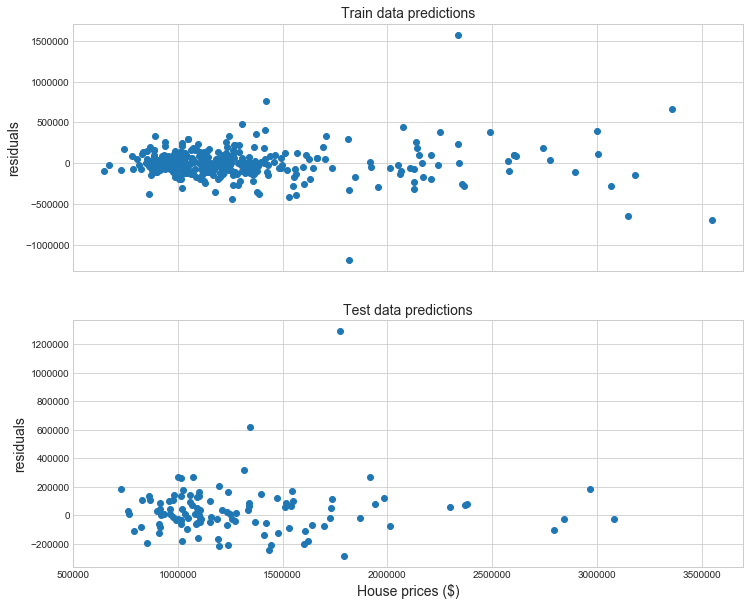

In [632]:
f,ax = plt.subplots(2,1,figsize=(12,10),sharex=True)

ax[0,].plot(y2_train_predict_lasso,(y2_train_predict_lasso-y2_train),'o')
ax[0,].set_ylabel('residuals',fontsize=14)
ax[0,].set_title('Train data predictions',fontsize=14)

ax[1,].plot(y2_test_predict_lasso,(y2_test_predict_lasso-y2_test),'o')
ax[1,].set_xlabel('House prices ($)',fontsize=14)
ax[1,].set_ylabel('residuals',fontsize=14)
ax[1,].set_title('Test data predictions', fontsize=14)

In [633]:
f.savefig('lasso_model_residuals.png',dpi=300)

In [1]:
plt.figure(figsize=(10,8))
sns.heatmap(houses_df5.corr(),cmap='RdBu_r')

NameError: name 'plt' is not defined